<a href="https://colab.research.google.com/github/siu1997/Big-Data-Analytics/blob/main/Practical%207/affinity_propogation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Affinity Propagation was first published in 2007 by Brendan Frey and Delbert Dueck in Science. In contrast to other traditional clustering methods, Affinity Propagation does not require you to specify the number of clusters. Data points can be exemplar (cluster center) or non-exemplar (other data points). Message is passed between exemplar (centroid) and non-exemplar data points. The total number of clusters will be automatically found by the algorithm.

In [1]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs
  
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1], [-1, -1]]
X, labels_true = make_blobs(n_samples = 400, centers = centers,
                           cluster_std = 0.5, random_state = 0)
# Compute Affinity Propagation
af = AffinityPropagation(preference =-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
  
n_clusters_ = len(cluster_centers_indices)

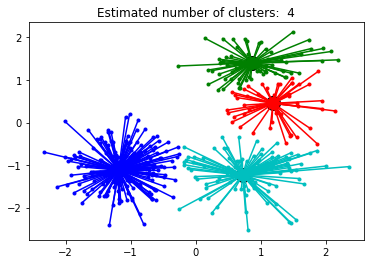

In [2]:
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')

for k, col in zip(range(n_clusters_), colors):
	class_members = labels == k
	cluster_center = X[cluster_centers_indices[k]]
	plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
	plt.plot(cluster_center[0], cluster_center[1], 'o',
			markerfacecolor = col, markeredgecolor ='k',
			markersize = 14)

	for x in X[class_members]:
		plt.plot([cluster_center[0], x[0]],
				[cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: % d' % n_clusters_)
plt.show()